In [2]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_gate_map
from qiskit import transpile
import numpy as np
from numpy import pi, array,sqrt,exp,savetxt,loadtxt

In [3]:
from qiskit import IBMQ
IBMQ.delete_account()
#your own token
Token = ''
IBMQ.save_account(Token)
provider = IBMQ.load_account()

In [4]:
provider = IBMQ.get_provider(hub = "" , group= "", project = "")
#your standard provider
backend = provider.get_backend("")
#some backend

In [5]:
#GHZ Circuit for qiskit

def GHZ_circ(n_qubits):
    
    ghz = QuantumCircuit(n_qubits,n_qubits)

    ghz.h(0)
    for j in range(1,n_qubits):
        ghz.cx(0,j)
    ghz.barrier(range(n_qubits))
    ghz.measure(range(n_qubits),range(n_qubits))
    
    return ghz

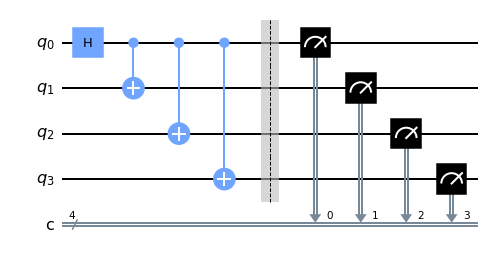

In [6]:
qc = GHZ_circ(4)
qc.draw('mpl')

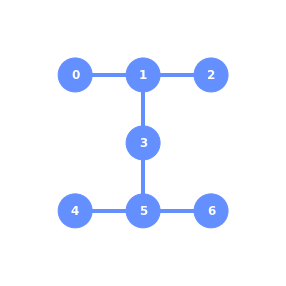

In [7]:
plot_gate_map(backend)

In [8]:
qubits_layout = [0,1,3,5]

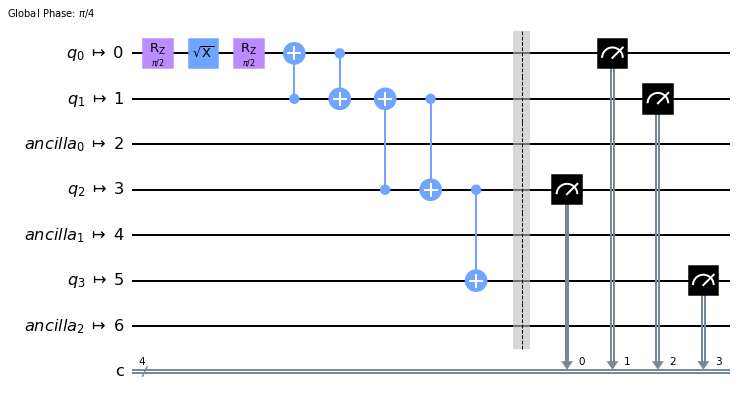

In [9]:
qc = transpile(qc, backend, initial_layout = qubits_layout[0:4], seed_transpiler=42)
qc.draw('mpl')

In [10]:
#RUN ideal simulation

max_nqubits = 5
shots = 1000
qubits_layout = [0,1,3,5,4]
counts_ideal = []
for i in range(2,max_nqubits+1):
    qc = GHZ_circ(i)
    qc = transpile(qc, backend, initial_layout = qubits_layout[0:i], seed_transpiler=42)
    sim_noise = AerSimulator(method='statevector')
    job = sim_noise.run(qc,shots=shots)
    result = job.result()
    counts = result.get_counts()
    counts_ideal.append(counts)

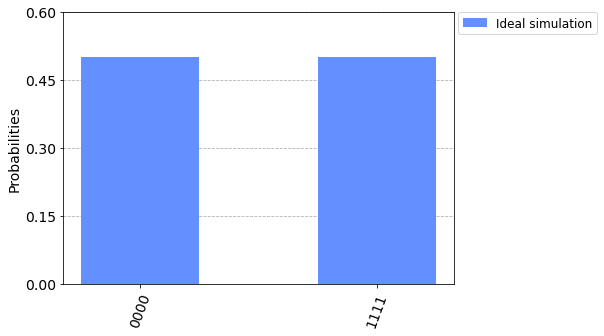

In [11]:
#See histograms 

i = 4

legend = ['Ideal simulation']

plot_histogram([counts_ideal[i-2]],bar_labels=False,legend=legend)

In [12]:
#Import libraries for Noise
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import phase_amplitude_damping_error

In [13]:
#example of noise channel definition
p = 0.2
dep = depolarizing_error(p,1)
print(dep)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.00024999999999997247, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.33325, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.33325, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.33325, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


In [14]:
spam = pauli_error([('X',10**-2), ('I', 1 - 10**-2)])
print(spam)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.01, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(1) = 0.99, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [15]:
#How to compose errors 
error_composed = dep.compose(spam)
print(error_composed)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 2.4999999999997253e-06, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ X ├
   └───┘└───┘
  P(1) = 0.0002474999999999728, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ I ├
   └───┘└───┘
  P(2) = 0.0033325000000000004, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ X ├
   └───┘└───┘
  P(3) = 0.32991750000000003, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ I ├
   └───┘└───┘
  P(4) = 0.0033325000000000004, Circuit = 
   ┌───┐┌───┐
q: ┤ Y ├┤ X ├
   └───┘└───┘
  P(5) = 0.32991750000000003, Circuit = 
   ┌───┐┌───┐
q: ┤ Y ├┤ I ├
   └───┘└───┘
  P(6) = 0.0033325000000000004, Circuit = 
   ┌───┐┌───┐
q: ┤ Z ├┤ X ├
   └───┘└───┘
  P(7) = 0.32991750000000003, Circuit = 
   ┌───┐┌───┐
q: ┤ Z ├┤ I ├
   └───┘└───┘


In [19]:
#How to get tensor product of two noise channels
composed = dep.tensor(dep)
print(composed)

QuantumError on 2 qubits. Noise circuits:
  P(0) = 6.249999999998623e-08, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ I ├
     └───┘
  P(1) = 8.331249999999082e-05, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ I ├
     └───┘
  P(2) = 8.331249999999082e-05, Circuit = 
     ┌───┐
q_0: ┤ Y ├
     ├───┤
q_1: ┤ I ├
     └───┘
  P(3) = 8.331249999999082e-05, Circuit = 
     ┌───┐
q_0: ┤ Z ├
     ├───┤
q_1: ┤ I ├
     └───┘
  P(4) = 8.331249999999082e-05, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ X ├
     └───┘
  P(5) = 0.1110555625, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
  P(6) = 0.1110555625, Circuit = 
     ┌───┐
q_0: ┤ Y ├
     ├───┤
q_1: ┤ X ├
     └───┘
  P(7) = 0.1110555625, Circuit = 
     ┌───┐
q_0: ┤ Z ├
     ├───┤
q_1: ┤ X ├
     └───┘
  P(8) = 8.331249999999082e-05, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ Y ├
     └───┘
  P(9) = 0.1110555625, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Y ├
     └───┘
  P(10) = 0.11

In [25]:
#IBM noise model for qiskit with depolarization, relaxation after gates and bit-flip before measurements

def IBM_noise_model(backend,qubits_layout):
    
    tg = 35 * 10**(-9)
    
    nqubit = len(qubits_layout)
    
    noise_model = NoiseModel()
    
    prop = backend.properties()
    
    t_cnot = np.zeros((nqubit,nqubit))
        
    p_cnot = np.zeros((nqubit,nqubit))
    
    
    #Read from backend

    T1 = [prop.t1(j) for j in qubits_layout]
    T2 = [prop.t2(j) for j in qubits_layout]
    p = [prop.gate_error('x',[j]) for j in qubits_layout]
    rout = [prop.readout_error(j) for j in qubits_layout]

    if (nqubit > 1):
        for i in range(0,nqubit):
            if (i == 0):
                t_cnot[0][1] = prop.gate_length('cx',[qubits_layout[0],qubits_layout[1]])
                p_cnot[0][1] = prop.gate_error('cx',[qubits_layout[0],qubits_layout[1]])
            if (i != 0 and i != nqubit-1):
                t_cnot[i][i-1] = prop.gate_length('cx',[qubits_layout[i],qubits_layout[i-1]])
                p_cnot[i][i-1] = prop.gate_error('cx',[qubits_layout[i],qubits_layout[i-1]])
                t_cnot[i][i+1] = prop.gate_length('cx',[qubits_layout[i],qubits_layout[i+1]])
                p_cnot[i][i+1] = prop.gate_error('cx',[qubits_layout[i],qubits_layout[i+1]])
            if (i == nqubit-1):
                t_cnot[i][i-1] = prop.gate_length('cx',[qubits_layout[i],qubits_layout[i-1]])
                p_cnot[i][i-1] = prop.gate_error('cx',[qubits_layout[i],qubits_layout[i-1]])
    
   
        
    for j in range(0,nqubit):
        
        #single qubit depolarizing
        
        dep = depolarizing_error(p[j],1)
        
        #single qubit relaxation
        
        Tph = T1[j] * T2[j] / (2 * T1[j] - T2[j])
        p1 = 1 - exp(-tg/T1[j])
        p_ph = 1 - exp(-tg/Tph)
        pz = (1 - p1) * p_ph
          
        relax = phase_amplitude_damping_error(p1,pz)
        
        #spam
          
        spam = pauli_error([('X',rout[j]), ('I', 1 - rout[j])])
        
        #adding errors to noise model
        
        single_qubit_gate_error = dep.compose(relax)
        
        noise_model.add_quantum_error(single_qubit_gate_error, ["x","sx"],[qubits_layout[j]])
        
        noise_model.add_quantum_error(spam, "measure",[qubits_layout[j]])
        

        
    for j in range(0,nqubit):
        for k in range(0,nqubit):
            if (k == j+1 or k == j-1):
                
                #two qubits relaxation
            
                Tph_j = T1[j] * T2[j] / (2 * T1[j] - T2[j])
                p1_j = 1 - exp(-t_cnot[j][k]/T1[j])
                p_ph_j = 1 - exp(-t_cnot[j][k]/Tph_j)
                pz_j = (1 - p1_j) * p_ph_j
                
                Tph_k = T1[k] * T2[k] / (2 * T1[k] - T2[k])
                p1_k = 1 - exp(-t_cnot[j][k]/T1[k])
                p_ph_k = 1 - exp(-t_cnot[j][k]/Tph_k)
                pz_k = (1 - p1_k) * p_ph_k
        
                relax_j = phase_amplitude_damping_error(p1_j,pz_j)
                relax_k = phase_amplitude_damping_error(p1_k,pz_k)
                relax_jk = relax_k.tensor(relax_j)
   
                
                #two qubits depolarizing
                
                dep_j = depolarizing_error(p_cnot[j][k],1)
                dep_k = depolarizing_error(p_cnot[j][k],1)
                dep_cnot = dep_k.tensor(dep_j) 
                
                #adding errors to noise model
                
                two_qubits_gate_error = dep_cnot.compose(relax_jk)
                
                noise_model.add_quantum_error(two_qubits_gate_error, "cx",[qubits_layout[j],qubits_layout[k]])
    
    return noise_model

In [26]:
#RUN IBM noise simulation

max_nqubits = 5
shots = 1000
qubits_layout = [0,1,3,5,4]
counts_noise = []
for i in range(2,max_nqubits+1):
    qc = GHZ_circ(i)
    qc = transpile(qc, backend, initial_layout = qubits_layout[0:i], seed_transpiler=42)
    noise_model = IBM_noise_model(backend,qubits_layout)
    sim_noise = AerSimulator(noise_model=noise_model,method='statevector')
    job = sim_noise.run(qc,shots=shots)
    result = job.result()
    counts = result.get_counts()
    counts_noise.append(counts)

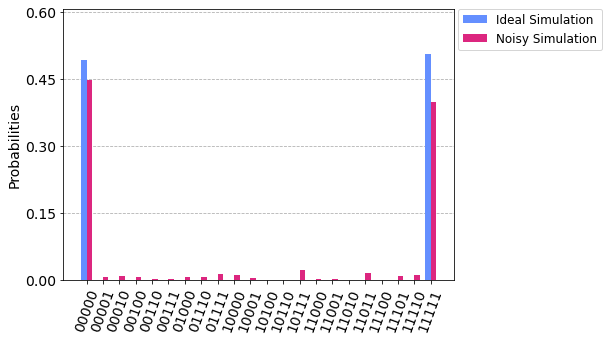

In [27]:
#See histograms 

i = 5

legend = ['Ideal Simulation','Noisy Simulation']

plot_histogram([counts_ideal[i-2],counts_noise[i-2]],bar_labels=False,legend=legend)

In [ ]:
#RUN ON ACTUAL HARDWARE

max_nqubits = 5
shots = 1000
qc_list = [None for i in range(0,max_nqubits-1)]
qubits_layout = [0,1,3,5,4]
counts_device = []
for i in range(2,max_nqubits+1):
    
    qc = GHZ_circ(i)
    qc_list[i-2] = transpile(qc, backend, initial_layout = qubits_layout[0:i],seed_transpiler=42)


job = backend.run(qc_list, shots=shots)
result = job.result()

for i in range(2,max_nqubits+1):
    
    counts = result.get_counts(qc_list[i-2])
    
    counts_device.append(counts)

In [ ]:
#See histograms 

i = 4

legend = ['Device','Ideal Simulation','Noisy Simulation']

plot_histogram([counts_device[i-2],counts_ideal[i-2],counts_noise[i-2]],bar_labels=False,legend=legend)